# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *13장 텐서플로로 따라하는 딥러닝*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 13.1 가장 인기있는 기계학습과 딥러닝 플랫폼 : 텐서플로

In [ ]:
import tensorflow as tf    # tensorflow의 별명은 tf로 한다

print(tf.__version__)      # version 앞뒤로 두 개의 밑줄을 사용한다

2.17.0


### 13.2 텐서플로 알아보기

### 13.3 MNIST 데이터 가져오기

In [ ]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =\
    mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('train_images.shape =', train_images.shape)
print('test_images.shape =', test_images.shape)
print('train_labels.shape =', train_labels.shape)
print('test_labels.shape =', test_labels.shape)

train_images.shape = (60000, 28, 28)
test_images.shape = (10000, 28, 28)
train_labels.shape = (60000,)
test_labels.shape = (10000,)


In [ ]:
num = train_images[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

### 13.4 MNIST 데이터 그리기

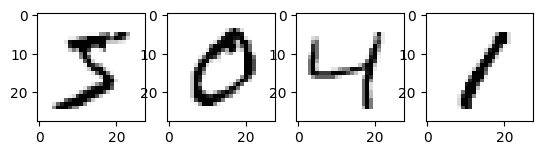

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [ ]:
print('train_labels[:4] =', train_labels[:4])

train_labels[:4] = [5 0 4 1]


In [ ]:
# 입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함
train_images, test_images = train_images / 255, test_images / 255

### 13.5 심층 신경망 모델을 만들고 하이퍼파라미터를 튜닝하자

In [ ]:
# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =\
    mnist.load_data()

train_images, test_images = train_images / 255, test_images / 255

model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()   # 모델의 구조를 요약하여 살펴보자

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

### 13.6 인공 신경망을 학습시켜 보자

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9704 - loss: 0.0998
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9809 - loss: 0.0625
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9862 - loss: 0.0431
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9932 - loss: 0.0226


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9763 - loss: 0.0841

테스트 정확도: 0.9763000011444092


### 13.7 인공 신경망의 성능을 개선해 보자

In [ ]:
# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =\
    mnist.load_data()

train_images, test_images = train_images / 255, test_images / 255

model = keras.Sequential([
   keras.layers.Input(shape=(28, 28)),
   keras.layers.Flatten(),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels,\
                                     verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8899 - loss: 0.3672
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9701 - loss: 0.0951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9802 - loss: 0.0588
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9842 - loss: 0.0487
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9879 - loss: 0.0381
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9903 - loss: 0.0310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9913 - loss: 0.0273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9922 - loss: 0.0230
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9949 - loss: 0.0170
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9934 - loss: 0.0221

테스트 정확도: 0.9786999821662903


In [ ]:
model = keras.Sequential([
   keras.layers.Input(shape=(28, 28)),
   keras.layers.Flatten(),
   keras.layers.Dense(1256, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels,\
                                     verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8953 - loss: 0.3313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9705 - loss: 0.1013
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9794 - loss: 0.0692
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9845 - loss: 0.0527
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9872 - loss: 0.0429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9899 - loss: 0.0345
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9912 - loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9922 - loss: 0.0256
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9933 - loss: 0.0229
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9925 - loss: 0.0275

테스트 정확도: 0.9822999835014343


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1256)                │         985,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         643,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,362,748 (20.46 MB)

 Trainable params: 1,787,582 (6.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,575,166 (13.64 MB)

### 13.8 새 이미지를 잘 학습하는가 알아보자

In [ ]:
test_images.shape

(10000, 28, 28)

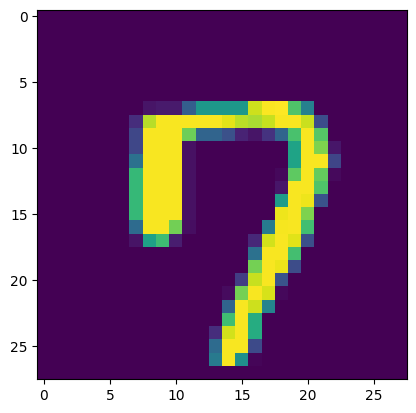

In [ ]:
randIdx = np.random.randint(0, 6000)  # 6000개의 테스트 이미지 중 하나를 선택
plt.imshow(test_images[randIdx])

In [ ]:
yhat = model.predict(test_images[randIdx])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

In [ ]:
pred = model.predict(test_images[randIdx][np.newaxis, :, :])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[3.9564155e-17, 2.2000122e-24, 1.3337959e-22, 1.2201029e-25,
        6.9757449e-13, 1.5995787e-18, 1.2371052e-34, 1.0000000e+00,
        5.4064424e-23, 4.9339414e-11]], dtype=float32)

In [ ]:
print(pred.argmax())

7


### 13.9 부드러운 최대값을 출력하는 소프트맥스 함수

In [ ]:
import numpy as np

def softmax(a):
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp     # 각각의 확률값을 구함
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [ ]:
np.set_printoptions(precision=4, suppress=True)
print('소프트맥스 함수의 출력 :', softmax(a))

소프트맥스 함수의 출력 : [0.0047 0.1734 0.035  0.7773 0.0095]


In [ ]:
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

소프트맥스 함수의 최대값 : 0.7772704668966948


### 13.10 직접 만든 이미지를 업로드하고 시각화하자

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving myNumber.png to myNumber.png


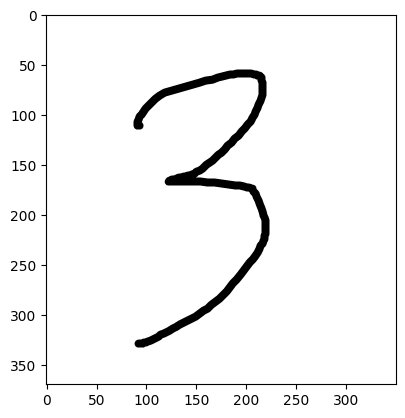

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./myNumber.png')
plt.imshow(img)

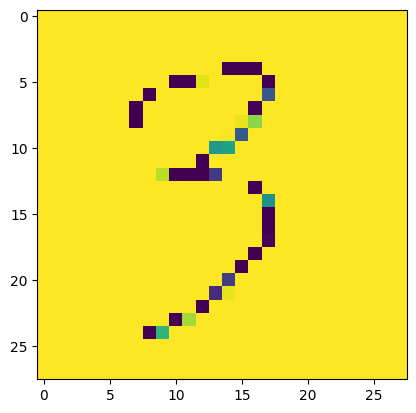

In [ ]:
import cv2
img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

### 13.11 이미지 데이터의 전처리 기법

In [ ]:
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


7

In [ ]:
pred.argmax()

7

In [ ]:
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(img[i][j]), end='')
    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0 245 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255  69 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255   2 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 248 211 255 255 255 255 255 255 255

In [ ]:
# 이미지의 색상을 반전시키고 0에서 1사이의 실수로 만들자
img = (255 - img) / 255
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


3

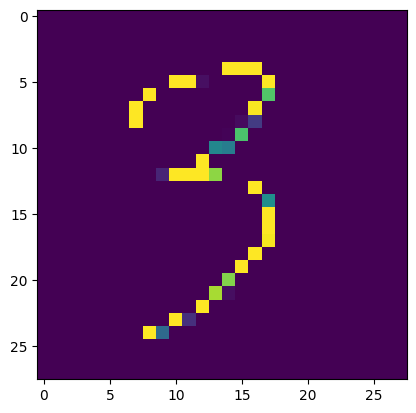

In [ ]:
plt.imshow(img)

### 13.12 붓꽃 데이터의 분류에 도전하자

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.20)
# 학습 데이터와 테스트 데이터의 형태와 개별 훈련 데이터의 형태를 살펴보자.
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:',y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:',y_test.shape)
print('개별 훈련 데이터의 형태:', x_train[0].shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태: (120,)
테스트용 데이터의 형태: (30, 4)
테스트용 데이터의 레이블 형태: (30,)
개별 훈련 데이터의 형태: (4,)


In [ ]:
from tensorflow import keras

# 순차 모델을 생성하자
model = keras.models.Sequential( [
    #keras.layers.Flatten(input_shape = (4,)), # 경고발생
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(3, activation= 'softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
24/24 - 1s - 39ms/step - accuracy: 0.2583 - loss: 1.2113
Epoch 2/30
24/24 - 0s - 2ms/step - accuracy: 0.5000 - loss: 1.0114
Epoch 3/30
24/24 - 0s - 3ms/step - accuracy: 0.6833 - loss: 0.8711
Epoch 4/30
24/24 - 0s - 3ms/step - accuracy: 0.6917 - loss: 0.7610
Epoch 5/30
24/24 - 0s - 6ms/step - accuracy: 0.6917 - loss: 0.6896
Epoch 6/30
24/24 - 0s - 6ms/step - accuracy: 0.7583 - loss: 0.6416
Epoch 7/30
24/24 - 0s - 2ms/step - accuracy: 0.6917 - loss: 0.5915
Epoch 8/30
24/24 - 0s - 2ms/step - accuracy: 0.7833 - loss: 0.5585
Epoch 9/30
24/24 - 0s - 2ms/step - accuracy: 0.7417 - loss: 0.5291
Epoch 10/30
24/24 - 0s - 3ms/step - accuracy: 0.7000 - loss: 0.5112
Epoch 11/30
24/24 - 0s - 5ms/step - accuracy: 0.9333 - loss: 0.4874
Epoch 12/30
24/24 - 0s - 5ms/step - accuracy: 0.7417 - loss: 0.4663
Epoch 13/30
24/24 - 0s - 2ms/step - accuracy: 0.8750 - loss: 0.4618
Epoch 14/30
24/24 - 0s - 3ms/step - accuracy: 0.7750 - loss: 0.4395
Epoch 15/30
24/24 - 0s - 2ms/step - accuracy: 0.9500 - l

In [ ]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 0.2573
붓꽃 데이터의 분류 정확도 : 1.0


### 13.13 분류 정확도를 높이기 위한 층을 추가하자

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(30, activation= 'relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation= 'softmax'),
])

model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


신경망 모델의 학습 결과 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.0826
붓꽃 데이터의 분류 정확도 : 1.0


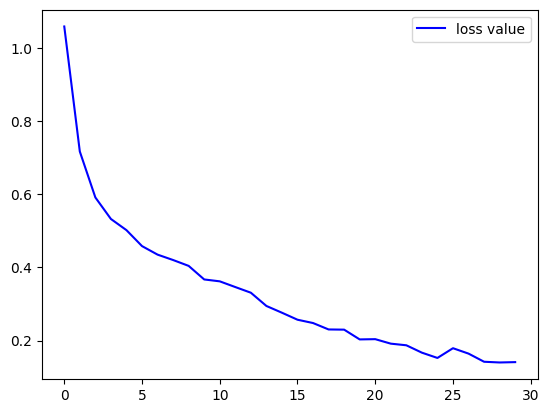

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

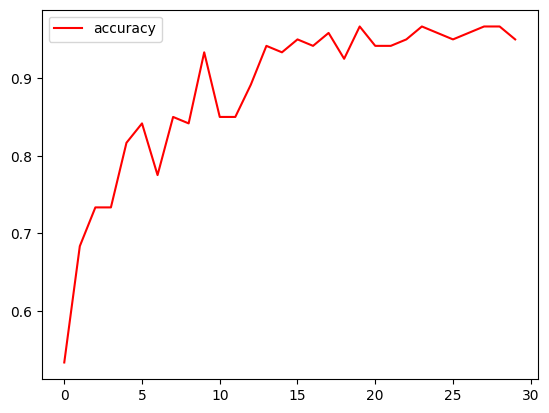

In [ ]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

### 13.14 학습한 모델을 저장하고 불러오자

In [ ]:
model.save('./iris_model.keras')

In [ ]:
!ls -l

total 56
-rw-r--r-- 1 root root 49856 Aug 23 12:28 iris_model.keras
drwxr-xr-x 1 root root  4096 Aug 21 13:28 sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
model.save('./drive/MyDrive/iris_model.keras')

In [ ]:
loaded =keras.models.load_model('./drive/MyDrive/iris_model.keras')
loaded.summary()

### 13.15 수치값을 예측하는 딥러닝 모델

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

x_train = np.array([[0], [1], [2]])
y_train = 3 * x_train + 1  # y = 3x + 1 꼴의 함수

x_test = np.array([[3], [4], [5]])
y_test = 3 * x_test + 1  # y = 3x + 1 꼴의 함수

print('x_train :', x_train.flatten(),' y_train :', y_train.flatten())
print('x_test :', x_test.flatten(),' y_test :', y_test.flatten())

x_train : [0 1 2]  y_train : [1 4 7]
x_test : [3 4 5]  y_test : [10 13 16]


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input((1,)))
model.add(keras.layers.Dense(4, None))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pred = model.predict(x_test)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[3.7889]
 [5.0518]
 [6.3148]]


In [ ]:
#model.compile('SGD', 'mse')
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=2)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 10.8578  
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 6.8041 
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2222 - loss: 3.7590     
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3889 - loss: 1.1807 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3889 - loss: 0.3079 
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3889 - loss: 0.0947
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2222 - loss: 0.0320    
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3889 - loss: 0.0106
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3889 - loss: 0.0056
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3889 - loss: 0.0037 
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3889 - loss: 0.0034 
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3889

In [ ]:
pred = model.predict(x_test)
print('x_test :', x_test.flatten(),' 예측 :', pred.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
x_test : [3 4 5]  예측 : [10.0241 13.0429 16.0616]
